In [ ]:
library(tidyverse)

In [ ]:
mutation_df <- read_csv("protien_mutations_dataset.csv")
head(mutation_df)

Rows: 2648 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): CLID, PDB, CHAIN, MUT
dbl (3): DDG, pH, T

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


CLID,PDB,CHAIN,MUT,DDG,pH,T
<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
1A23A,1FVK,A,C30S,-1.79,7.5,25
1A23A,1FVK,A,C33S,-1.15,7.5,25
1A23A,1FVK,A,H32L,5.30,7.0,30
1A23A,1FVK,A,H32S,5.20,7.0,30
1A23A,1FVK,A,H32Y,6.80,7.0,30
1A43A,1A43,A,C218S,-3.70,7.3,25


In [ ]:
# Obtain the emperical data's corrolation of DDG and Temperature
corr_ddg_t <- cor(mutation_df$T,mutation_df$DDG,method = "pearson")
cat("Obtained Emperical Corrolation of Mutation Stability and Temperature: ",corr_ddg_t)
# Result shows a positive relationship although modest

Obtained Emperical Corrolation of Mutation Stability and Temperature:  0.190354

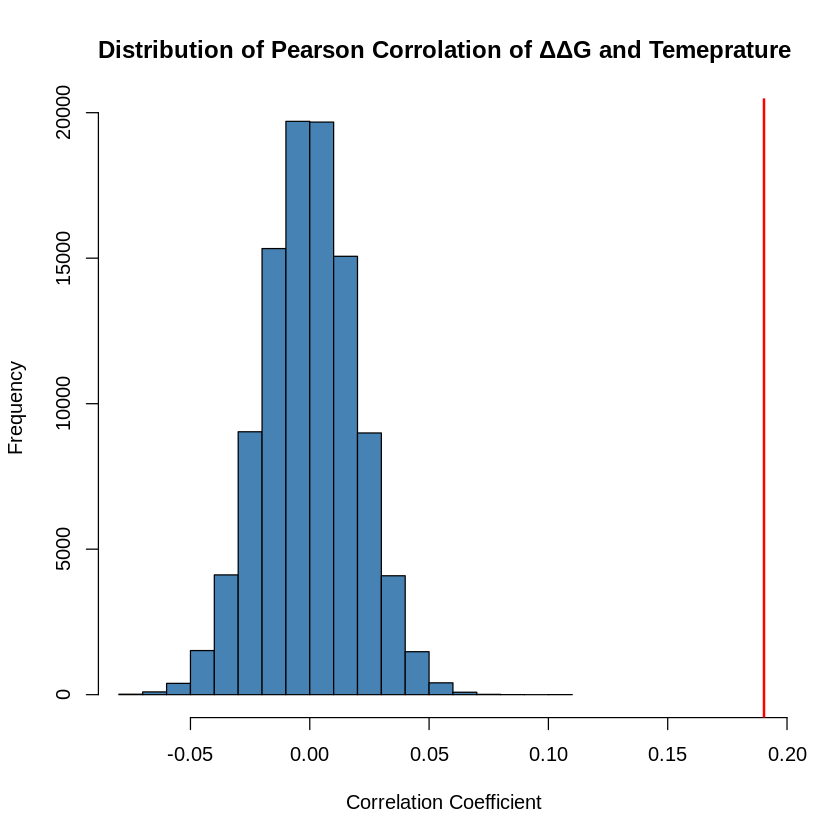

In [ ]:
# If we want to challenge the temperature-invariant ΔΔG hypothesis, we want to show that
# The distribution of correlation values for each permutation under the null hypothesis of
# There is no significant relationship between ΔΔG and Temperature. In another way to say it is through the lens
# Where if I abide with the temperature-invariant ΔΔG hypothesis, where ΔΔG and temperature are independent of one
# Another, then what I should expect to find is that a correlation of 0.19 or higher is a common occurance,
# Otherwise, we can determine that it is not just a random outcome but a real relationship is at play, thus
# Challenging the strict rule of the temperature-invariant ΔΔG hypothesis in protein mutations.

n_permu <- 100000
all_perm_corr <- numeric(n_permu)
for (i in 1:n_permu){
  shuffled_ddg <- sample(mutation_df$DDG)
  corr <- cor(mutation_df$T,shuffled_ddg,method = "pearson")
  all_perm_corr[i] <- corr
}

hist(
  all_perm_corr,
  col="steelblue",
  border = "black",
  main = "Distribution of Pearson Corrolation of ΔΔG and Temeprature",
  xlab = "Correlation Coefficient",
  xlim = range(c(all_perm_corr,corr_ddg_t))
)
abline(v = corr_ddg_t, col="red",lwd = 2)

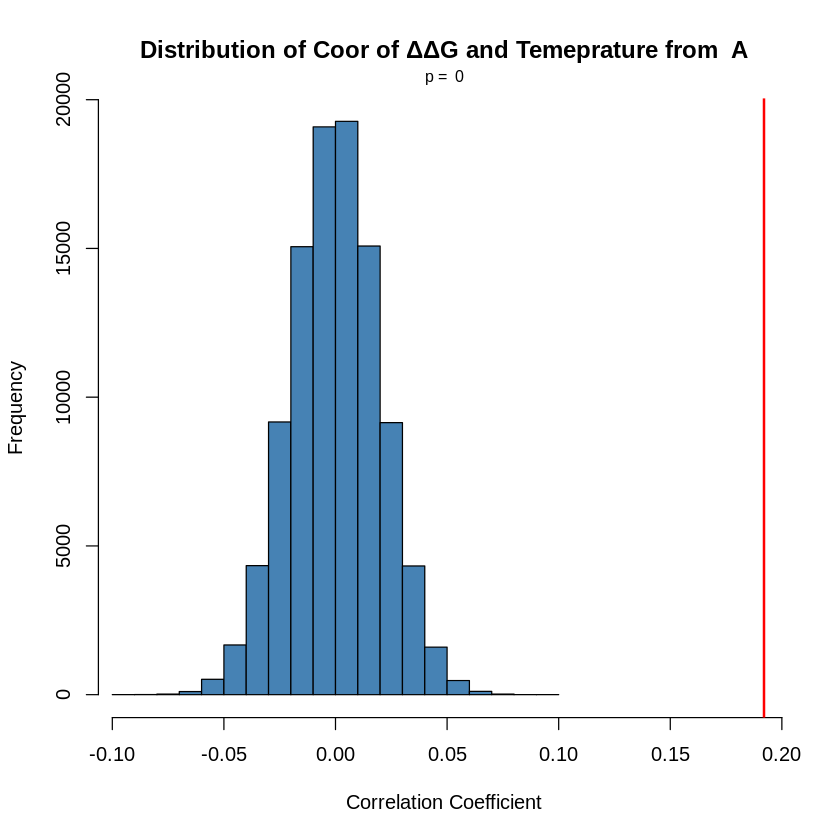

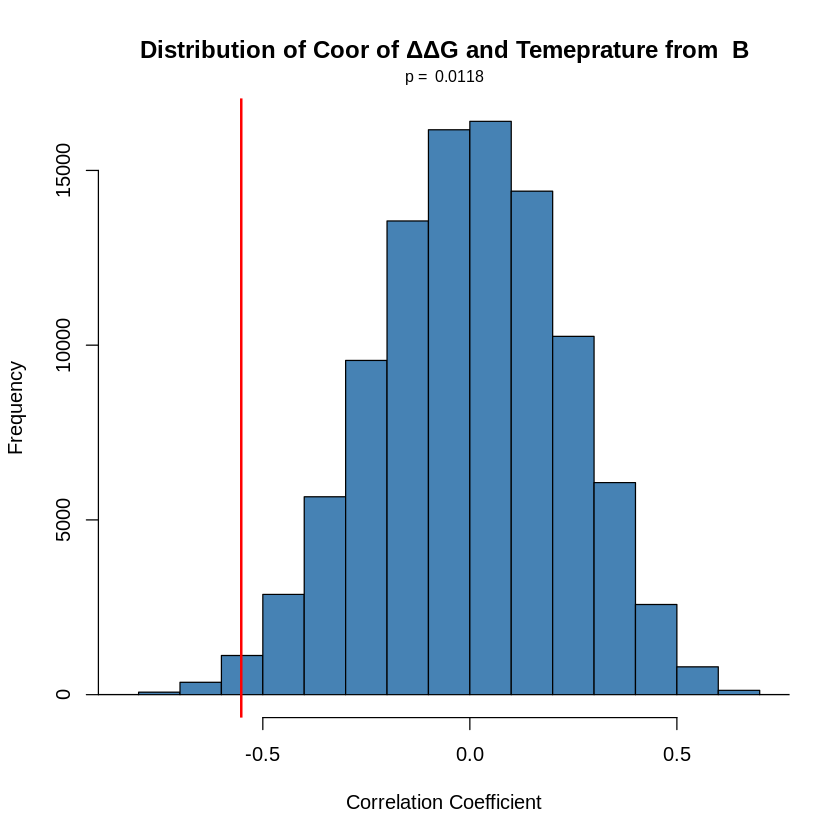

Warning message in cor(chain_df$T, chain_df$DDG, method = "pearson"):
“the standard deviation is zero”


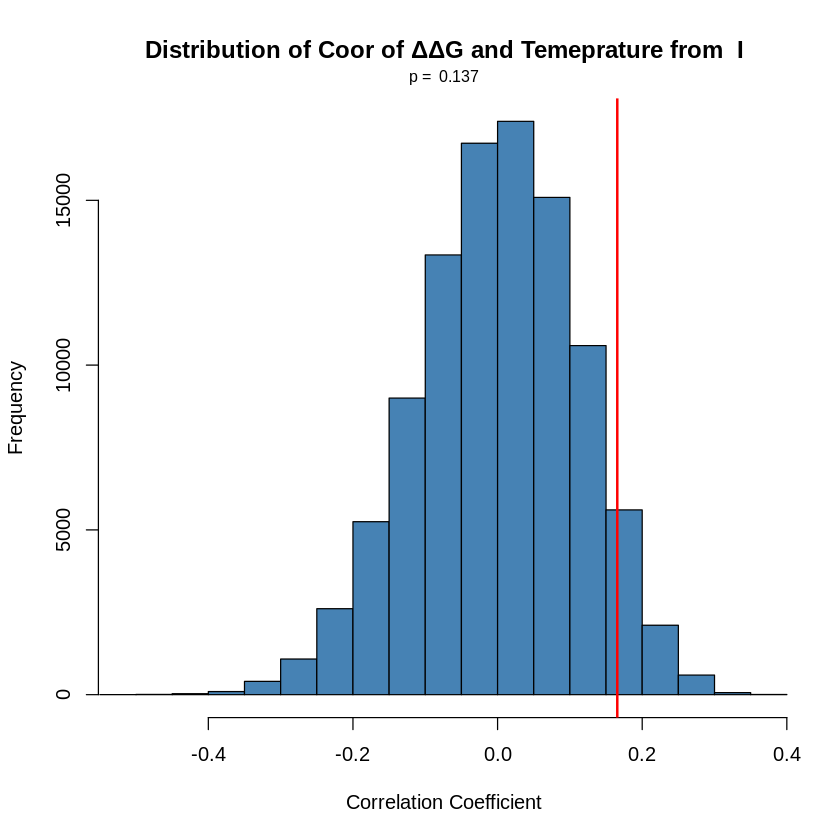

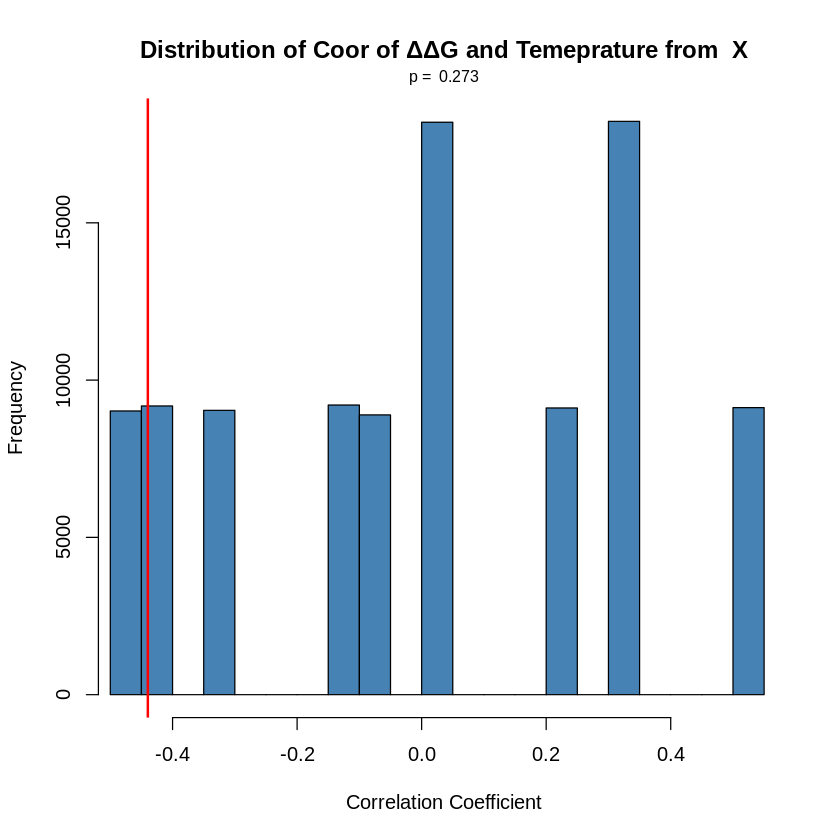

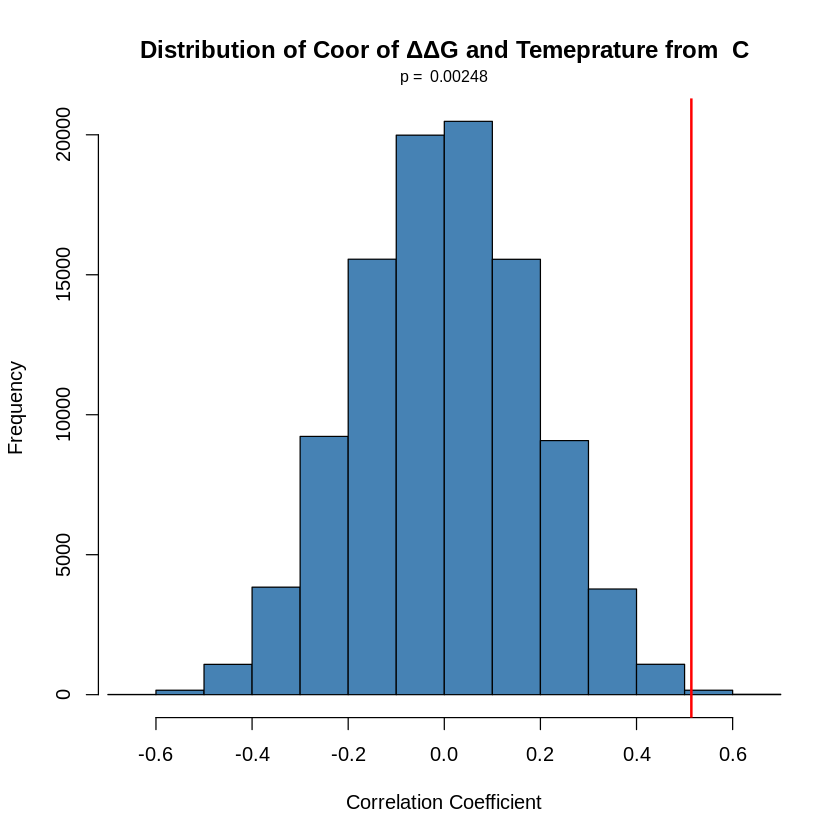

In [ ]:
unq_chain <- unique(mutation_df$CHAIN)
for (chain in unq_chain){
  chain_df <- mutation_df[mutation_df$CHAIN == chain, ]
  emp_corr <- cor(chain_df$T,chain_df$DDG,method = "pearson")
  if (is.na(emp_corr)){
    next
  }
  all_perm_corr <- numeric(n_permu)
  for(i in 1:n_permu){
      shuffled_ddg <- sample(chain_df$DDG)
      corr <- cor(chain_df$T,shuffled_ddg,method = "pearson")
      all_perm_corr[i] <- corr
  }
  p_val <- mean(abs(all_perm_corr) >= abs(emp_corr))
  hist(
    all_perm_corr,
    col="steelblue",
    border = "black",
    main = paste("Distribution of Coor of ΔΔG and Temeprature from ",chain),
    xlab = "Correlation Coefficient",
    xlim = range(c(all_perm_corr,emp_corr))
  )
  abline(v = emp_corr, col="red",lwd = 2)
  mtext(paste("p = ",signif(p_val,3)),side = 3,line=0.5,cex = 0.8)
}

In [ ]:
# Based on the permutation test the only chains that are temperature sensitive are chains A, B, and C. Wherein the data showed a strong corrolation
# for A and C have positive correlation and B has a strong negative correlation, with the permutation test it showed that the p valued for each of these
# shows that these are rare occurances for all permutations of the data, indicating the validity of the emperical measurement of the corresponding
# correlation.